# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

In the initial state of the agent.py code, the smartcab doesn't move at all, it's position on the grid is random every time you run the code, the agent gets rewarded for states involving the combinations between the state of the traffic lights, the oncoming traffic and the actions taken by the agent (i.e. positive reward if red light and the agent is stopped, negative reward if green lights, no oncomming traffic and agent is stopped, etc.).

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

Flags that can be set in agent.py:
    - num_dummies: sets the number of agents we might have to deal with while moving through the environment
    - update_delay: sets the delay time between the action of the agents
    - learning: if True, it forces the driving agent to start using Q-learning

The *act* function in the Environment class is called every time an agent performs an action.

The *`'render()'`* function draws the GUI of the Environment class and *`'render_text()'`* draws the text on the terminal/command prompt describing the data related to the state of the smartcab agent, the rewards for its actions, the remaining time for the trial, etc.

In the *`'next_waypoint()'`* function considers *East-West* directions first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


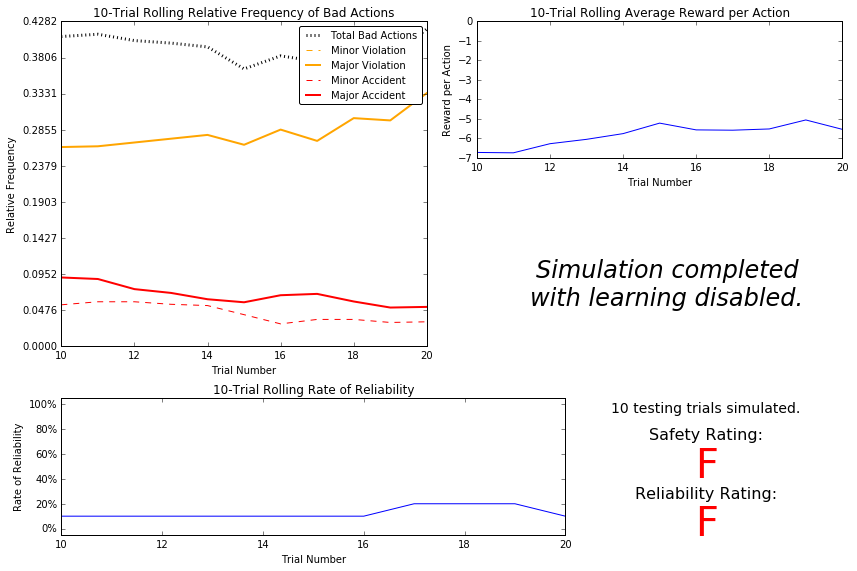

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

As expected, an agent driving randomly has the lowest safety and reliability ratings. According to the top left chart, more than 40% of the agent's actions are bad and if you sum major and minor accidents, more than 10% of its actions causes accidents. Its reliability score is also never greater than 20%, according to the bottom left chart, and it ends at 10%, meaning the agent was able to get to its destination only 2 of its 20 training trials.

Since a lot of its actions were bad and with significant amount of accidents caused by the agent, the average reward per action on the top right chart is, as expected, very low. Since the *enforce_deadline* flag was set, the rewards were getting more negative every time a trial would get closer to the end, and for every minor and major accidents caused the rewards would get subtracted extra -20 and -40 points respectively. Therefore, it makes sense that the average reward per action would get as low as to approximately -7, which demonstrates heavy penalizations over the agent.

Given that the behavior of the agent is always random, there's no information gain at all (about the map or the rules of how the car gets rewarded) as the number of trials increases. For that reason, the results for each trial are pretty consistent and we don't see any significant improvement or decrease in them.

With that being said, with the smartcab only being able to reach its destination 10% of the time and also causing a significant amount of accidents, it is definitely considered unreliable and unsafe.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

For an agent to learn how to act in a safe manner it definitely needs to take the `'light'` and the `'oncoming'` features into consideration. From that sensor data, it can learn how to avoid collisions with other agents and to respect the traffic lights. The `'left'` and `'right'` features aren't strictly necessary since everytime the lights are green to the smartcab the lights should be red for the agents on the left and right of the smartcab. When the lights are red to the smartcab, even though according to the U.S. traffic law it's legal, going right can cause accidents and this action should also be avoided.

The `'deadline'` feature is calculated as 5 times the distance between the smartcab's starting position and its destination, so it can get to big numbers. If we add it to the state, then, we would get a state space way too big for the agent to learn a policy for each possible state within a reasonable number of training trials. Also, since the rewards function already incorporates it by making the rewards smaller or bigger depending on the number of steps taken by the smartcab, the `'deadline'` feature is not strictly necessary for the efficiency of the algorithm.

If the map was always the same (meaning the agent's starting point and its destination were constant in every trial) we wouldn't need any more features to improve the efficiency of the algorithm. As demonstrated in the classes about the Q-Learning algorithm, even without the knowledge of the map or the location of the end goal, it is possible to calculate the utility function of the problem after a few trials and then guarantee the efficiency of the smart agent. In this case, though, the map is constantly changing every trial, therefore the `'waypoint'` feature is extremely important as well.

Therefore, for safety and efficiency `'waypoint'`, `'light'` and `'oncoming'` are relevant for modeling the smartcab's behavior in the environment.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The features selected in **Question 4** would define a state of the Smartcab such as follows:

`('waypoint', 'is_red_light', 'direction_oncoming')`

The `'waypoint'` feature have 3 possible states each. The `'is_red_light'`, 2 and the `'direction_oncoming'`, 4. If we don't consider the `'deadline'` feature, we therefore have a state space of size `3*2*4 = 24`. Since of states is relatively small, the smartcab can learn a driving policy for each possible state within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

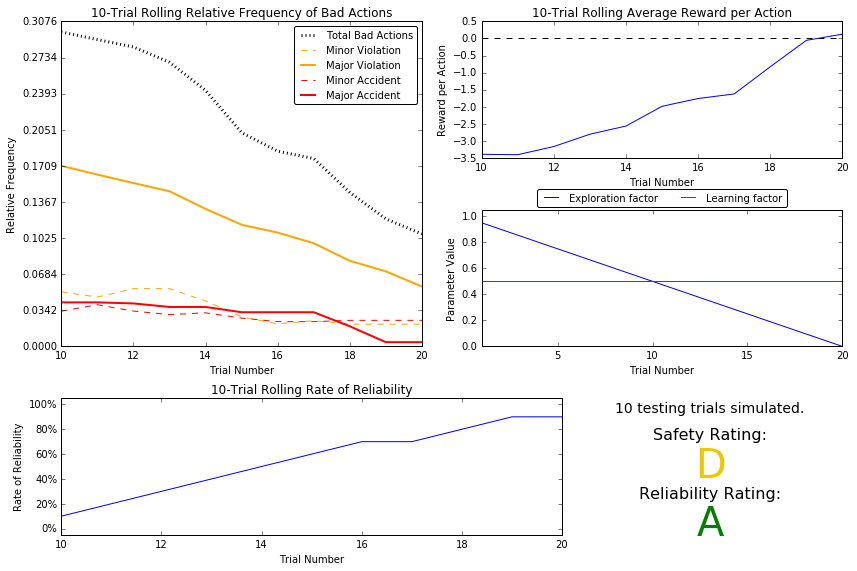

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

From the charts above in comparisson to the ones on **Question 3**, we're able to see a significant improvement in the behavior of the smartcab. The number of total bad actions has decreased from more than 40% to only slightly over 10%. The number of major accidents has decreased to approximately 0. The rate of reliability has increased from 10% to over 80%. Last but not least, the average reward per action started to become positive at the end of the training trials, meaning the smartcab's good decisions (positive rewards) started to outweigh its bad decisions (negative rewards).

The smart agent still causes a few minor accidents, which is really bad in a real scenario, therefore the D safety rating. If we look at the `sim_default-learning.txt` file, we can notice there's a few state-action pairs that still have values equal to 0, meaning they were probably never visited and, therefore, the smartcab doesn't have enough information to decide if it's a safe and/or reliable attitute.

The $\epsilon$ decays linearly as expected and as demonstrated in the `Parameter Value vs Trial Number` chart. It starts from a value of 1.0 and it decreases with a rate of 0.05. In 20 training trials, the exploration factor decays from 1.0 to 0.0 (just bellow the 0.05 default epsilon-tolerance specified in the code). The $\alpha$ (learning rate) parameter is kept constant and equal to 0.5 and should be modified. According to the demonstraded in the RL classes for a Q-learning agent to converge, the learning rate should decrease in time such as the sum of the learning rates should diverge, but the sum of its squares should converge.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

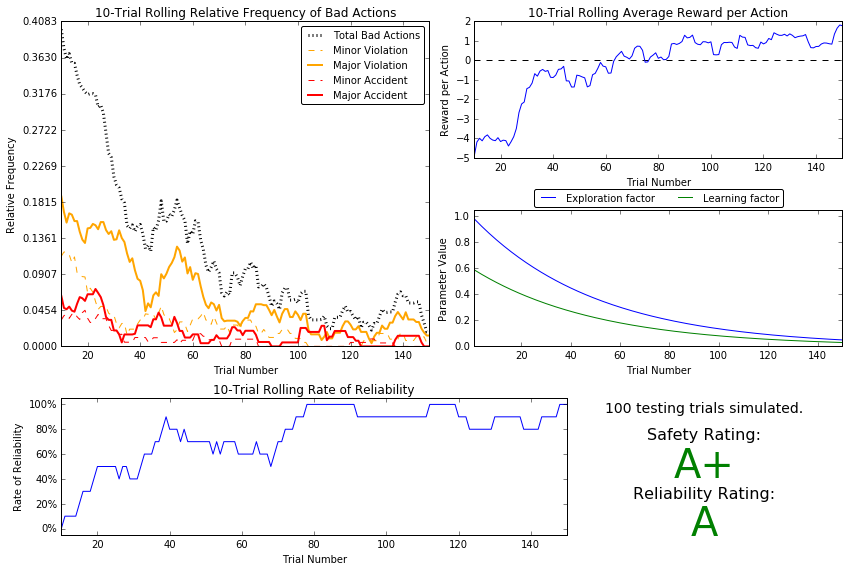

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

In this final optimization, we're able to see a really good performance from the smartcab in both safety and reliability. After tuning the $\epsilon$ and $\alpha$ parameters and their decay functions, we are able to let the agent train long enough so that its table of Q-values estimates are closer to their convergence points (the solution to the value iteration algorithm). The exploration tolerance parameter was kept unchanged (0.05) and the $\epsilon$ decay function was tuned to $ \epsilon = e^{-t/50} $ so the smartcab could run approximately 150 training trials ($e^{-3} \approx 0.049$). The learning rate was set to $ \alpha = 0.6e^{-t/50} $ to decay with the exploration factor, so the agent would weigh its initial rewards (when it was still exploring the environment) higher than its latest rewards (when it was mostly iteraring over the highest Q-values).

The smartcab behavior is also a lot more robust. The number of testing trials was increased to 100 in the results above. The smartcab was able to score the highest rating (A+) on safety and a really great rating (A) on reliability, meaning it didn't commit any traffic violations, always chose the correct actions and reached its destination on time over 90% of the trials. On the previous tests, even on a testing set of only 10 trials the highest safety rating the smartcab scored was D, meaning in both cases it commited at least one minor accident and with a higher number of testing trials it's likely the rating would get worse.

As we can see in the left charts, on the latest training trials the number of total bad actions were bellow 3% and the reliability was above 90%. The average reward per action was also positive (top right chart), meaning the majority of the smartcab's action were positively rewarded (good actions). When we compare the Q-values tables in the `sim_improved-learning.txt` and `sim_default-learning.txt` files, we can spot a lot of likely unvisited state-action pairs ($Q(s,a) = 0$) in the later one, whereas in the first one all state-action pairs were visited at least once ($Q(s,a) \neq 0$). With those results, it's safe to say the smartcab was able to learn an appropriate (not necessarily an optimal) policy for this environment.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

The chosen state variables were:

`('waypoint', 'is_red_light', 'direction_oncoming')`

Considering the U.S. right-of-way traffic laws, examples of Q-values from an optimal policy would be:

*(Q-values here are solely demonstrative and are not related to the rewards in the simulation, meaning the simulated Q-values might be significantly different.)*

`('forward', 'red', None)`

    -- forward:-10.0 #major violation
    -- right: -5.0   #not a violation according to the U.S. laws, but it could be dangerous if there's cross traffic
    -- None: 10.0
    -- left: -10.0   #major violation

In this first example, the traffic lights are red so going `'forward'` or `'left'` is a major violation of traffic laws and may cause accidents depending on cross traffic, therefore the big negative rewards. Going `'right'` wouldn't be against the law, but it can be dangerous depending on cross traffic, and since it's not the direction pointed by the `'waypoint'`, it should be rewarded negatively. Respecting the lights and waiting for them to turn *green* is the correct action in this case, and that's why `None` is the highest positive reward for the policy in this state.

`('forward', 'green', 'forward')`

    -- forward: 10.0
    -- right: 5.0
    -- None: -5.0    #minor violation
    -- left: -10.0   #major accident

`('left', 'green', 'right')`

    -- forward: 5.0
    -- right: 5.0
    -- None: -5.0    #minor violation
    -- left: -8.0    #even though it's the correct direction, it can cause an accident, so it should be avoided

In these two examples, the lights are green, so not acting would be a minor violation and should be avoided. The main feature to observe, then, is the `'oncoming'` direction. In the first case, the oncoming agent is going `forward` and since the `'waypoint'` is pointing `forward` as well, there's no risk of collision and this should be the chosen action by the policy (hence the +10 reward). In the second case, the oncoming agent is going `right` and following the `'waypoint'` might cause an accident, so it's safer to go either `forward` or `right` and try to find another pathway to the goal.

In the learned policy simulated, we can see the following Q-values recorded in the `'sim_improved-learning.txt'` file:

`('forward', 'red', None)`

    -- forward:-10.1 #major violation
    -- right: -1.12  #not a violation according to the U.S. laws, but it could be dangerous if there's cross traffic
    -- None: 1.83
    -- left: -17.02  #major violation

`('forward', 'green', 'forward')`

    -- forward: 1.74
    -- right: 1.11
    -- None: -4.08   #minor violation
    -- left: -17.15  #major accident

`('left', 'green', 'right')`

    -- forward: 0.86
    -- right: 0.32
    -- None: -2.64   #minor violation
    -- left: -4.05   #even though it's the correct direction, it can cause an accident, so it should be avoided

You can see that in all these cases, even though the actual values are different, the order of the actions (from higher to lower Q-value) is the same as in the optimal policy shown above. Although, when we look at the case bellow, we notice there are other cases that didn't reach the optimal state:

`('left', 'green', 'left')`

    -- forward: 0.85
    -- right: 0.31
    -- None: 0.30    #minor violation
    -- left: 1.91    #even though it's the correct direction, it can cause an accident, so it should be avoided

In this case, an optimal action considering safety first would be `None`, because even though the smartcab has the legal right to go left, depending on the behavior of the oncoming agent there could an accident, so it's better to avoid an accident than to trust the behavior of an unknown agent.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

In this particular problem, a future state for a particular state-action pair could be any of all the possible states in the Q-table. That's because the smartcab doesn't know where it's at in the environment and it interacts with several different agents in its trajectory to the goal. With these constrains on the knowledge of the smartcab, the future state could have any direction as the `'waypoint'` feature, any state for the `'is_red_light'` feature and any direction for the `'direction_oncoming'`. Therefore, including future states to the learning algorithm would end up in propagating backwards different behaviors each trial, depending on the randomness of the state of the dummy agents and of the starting and goal positions for the smartcab. With this randomness, it could happen, for example, that in a particular trial a future state would prevent the smartcab from following the waypoint to avoid an accident with another agent and, then, a positive reward from a non-optimal action would be propagated backwards to previous states. In different trials, though, the accident is not necessarily going to happen, so the propagated reward could end up negatively affecting the Q-values pushing them away from the optimal values.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.